### Lucas Leal Vale

### Pergunta: Como o acesso a internet influencia no desenvolvimento do IDH ?

### Introdução
##### Estamos em contato com a internet o tempo todo no nosso dia a dia e apesar de ser um advento super recente já não conseguimos imaginar as nossas vidas sem este meio de comunicação, tão pratico. Porém, se voltarmos um pouco no tempo cerca de 25 anos  praticamente apenas os computadores estavam no cenário, e eles não eram nada acessiveis.
##### Poucos eram os paises que tinham acesso e dentro desses pais apenas as grandes empresas detinham as maquinas que do nosso ponto de vista atual eram relativamente rudimentares.
##### O tempo foi passando, o acesso às maquinas foi aumentando e com o andar da carroagem a internet tambem se tornou algo super banal. E inclusive graças a ela podemos pesquisar, estudar, trabalhar e gerar empregos com ela. Por isso acredito que os paises que investiram em infraesturura de suas malhas de redes e ao acesso da internet tivaram um crescimento economico ainda mais destacado do que aqueles que permaneceram defasados tecnologicamente.
#### E esse será o foco deste projeto.

### Pergunta: Como o acesso a internet influencia no desenvolvimento do IDH ?

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt

#### Lendo os dataframes

In [2]:
Cel = pd.read_excel('cell_phones_total.xlsx')
Pc = pd.read_excel('personal_computers_per_100_people.xlsx')
Idh = pd.read_excel('Indicator_HDI.xlsx')
Int = pd.read_excel('internet_users.xlsx')

#### Visualizando os dataframes que serao utilizados

In [3]:
#Cel.head()

In [4]:
#Pc.head()

In [5]:
#nt.head()

In [6]:
#Idh.head()

#### Reindexando os dataframes para evitar erros devido ao index numerico

In [7]:
Cel_idx = Cel.set_index('geo')
Pc_idx = Pc.set_index('geo')
Idh_idx = Idh.set_index('HDI')
Int_idx = Int.set_index('geo')

#### Adicionando sufixo nas colunas para que nao haja colisao durante a juncao dos dataframes

In [8]:
Idh_idx = Idh_idx.add_suffix('_IDH')
Cel_idx = Cel_idx.add_suffix('_Cel')
Pc_idx = Pc_idx.add_suffix('_Pc')
Int_idx = Int_idx.add_suffix('_Int')

#### Juntando os dataframes em um unico, note que juntei os tres usando o dataframe de IDH como base.

In [9]:
Idh_idx = Idh_idx.join(Cel_idx, how="inner")

In [10]:
Idh_idx = Idh_idx.join(Int_idx, how="inner")

In [11]:
df=Idh_idx.join(Pc_idx, how="inner")

In [12]:
df.index.name = 'geo'

In [13]:
df.head()

,1980_IDH,1990_IDH,2000_IDH,2005_IDH,2006_IDH,2007_IDH,2008_IDH,2009_IDH,2011_IDH,1960_Cel,...,1997_Pc,1998_Pc,1999_Pc,2000_Pc,2001_Pc,2002_Pc,2003_Pc,2004_Pc,2005_Pc,2006_Pc
geo,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.198,0.246,0.230,0.340,0.354,0.363,0.370,0.387,0.398,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.28,0.32
Albania,NaN,0.656,0.691,0.721,0.724,0.729,0.733,0.734,0.739,0.0,...,0.32,0.49,0.65,0.82,0.98,1.17,1.36,1.54,1.73,3.81
Algeria,0.454,0.551,0.624,0.667,0.673,0.680,0.686,0.691,0.698,0.0,...,0.48,0.54,0.60,0.66,0.71,0.77,0.83,0.90,1.07,NaN
Angola,NaN,NaN,0.384,0.445,0.459,0.471,0.476,0.481,0.486,0.0,...,0.06,0.08,0.09,0.11,0.12,0.18,NaN,NaN,0.59,0.70
Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.764,0.0,...,NaN,NaN,NaN,NaN,10.30,11.40,12.60,13.70,14.80,21.20


### Agora que dados de interesse já estão prontos para análise, irei começar com a análise de alguns anos com certo espaçamento temporal entre si, tentei manter uma distância de 10 anos. Contudo, o dataframe de IDH não possuia dados para o ano de 2010 por isso neste projeto as variáveis cruzadas irão até o ano de 2006, para maior precisão dos resultado.

### Como de se esperar os dados obtidos sobre o acesso a internet apenas começaram a ficar interessantes apartir de 2006, antes disso ou a segragação da internet era simplismente absurda ou se quer existia a internet.
### Em 2006, apenas poucos paises possuiam mais do que 40% de sua população ativa na internet como indica o histograma abaixo. Ou seja, ainda a grande maioria possuia poucas pessoas com acesso a rede. 
### Isso talvez nos de uma dica de que apenas os países desenvolvidos e consequentemente de IDH alto, são os que desde 2006 possuiam grande parte de sua população canectada.
### Entretanto ainda é muito cedo na análise para poder afirmar isso.

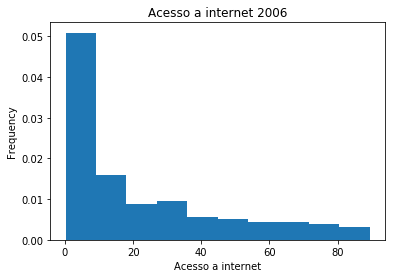

In [14]:
df['2006_Int'].plot.hist(density=True)
plt.xlabel('Acesso a internet')
plt.title('Acesso a internet 2006')
plt.show()

### Analisando o histograma de 2016, já é possivel de se destacar que o acesso a internet se tornou ainda mais dissiminado, e a pressuposição anterior já não é valida. Pois o instograma não nos permite visualizar quais países  estão em cada parte desse gráfico.

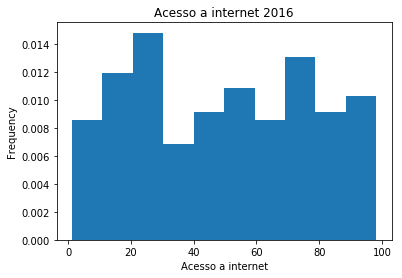

In [15]:
df['2016_Int'].plot.hist(density=True)
plt.xlabel('Acesso a internet')
plt.title('Acesso a internet 2016')
plt.show()

### Para visualisar se os países de IDH alto ainda são os países que possuem a maior dissiminação da internet em seu território. Será necessario o uso de um outro farramental, aplicado em seguida.

###### A função a seguir tem por objetivo complementar o gráfico de disperção com uma reta, que ajuda na visualização de uma possivel correlação entre as variaveis testadas

In [16]:
#Funcao extraida do site 'https://pastebin.com/0KcDyqKq', disponibilizado no blackboard pelos professores. Acesso 9h18 21/8/2018
def reta(dados_x, dados_y,titulo,eixox,eixoy):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()
 
    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
 
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.title(titulo)
    plt.xlabel(eixox)
    plt.ylabel(eixoy)
 
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')
 
    plt.tight_layout()
    plt.show()

### Analisando a correlação pelo uso de gráficos de dispersão e dos respectivos coeficientes de correlação

Ajuste linear entre X3 e X4:
Coeficiente linear: -5.029231308513229
Coeficiente angular: 14.790211439469818


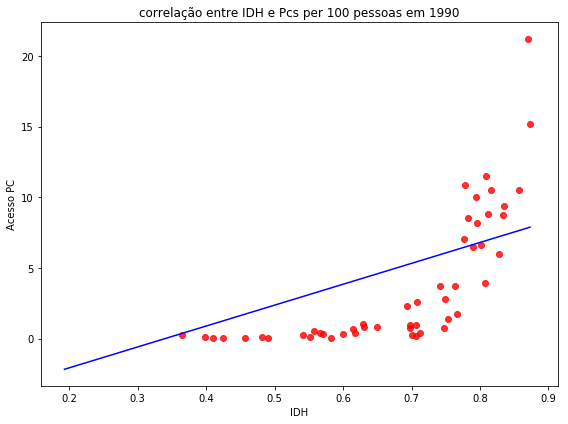

O coeficiente de correlacao entre o acesso aos computadores e o Idh é de 0.7265966620427668. 


In [17]:
reta(df["1990_IDH"],df['1990_Pc'],('correlação entre IDH e Pcs per 100 pessoas em 1990'),('IDH'),('Acesso PC'))
f=df["1990_IDH"].corr(df["1990_Pc"])
print("O coeficiente de correlacao entre o acesso aos computadores e o Idh é de {0}. ".format(f))

Ajuste linear entre X3 e X4:
Coeficiente linear: -25.1659452140145
Coeficiente angular: 57.160665336513226


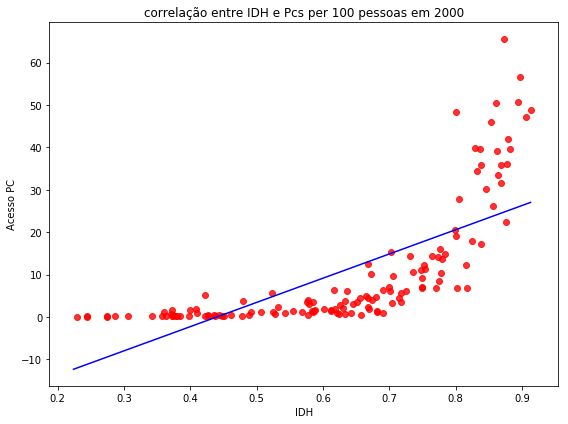

O coeficiente de correlacao entre o acesso aos computadores e o Idh é de 0.7239000743275265. 


In [18]:
reta(df["2000_IDH"],df['2000_Pc'],('correlação entre IDH e Pcs per 100 pessoas em 2000'),('IDH'),('Acesso PC'))
e=df["2000_IDH"].corr(df["2000_Pc"])
print("O coeficiente de correlacao entre o acesso aos computadores e o Idh é de {0}. ".format(e))

Ajuste linear entre X3 e X4:
Coeficiente linear: -44.68608260938624
Coeficiente angular: 104.59815216211504


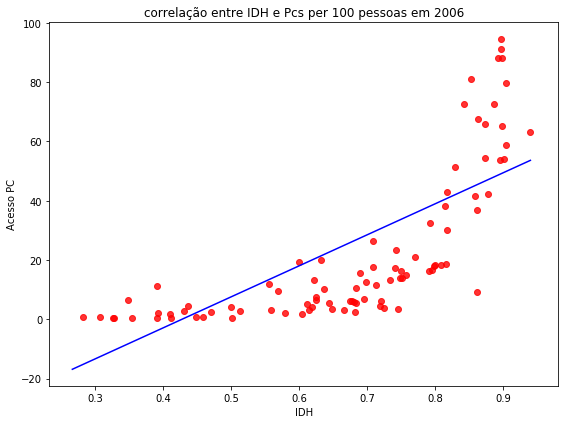

O coeficiente de correlacao entre o acesso aos computadores e o Idh é de 0.7308679530613986. 


In [19]:
reta(df["2006_IDH"],df['2006_Pc'],('correlação entre IDH e Pcs per 100 pessoas em 2006'),('IDH'),('Acesso PC'))
d=df["2006_IDH"].corr(df["2006_Pc"])
print("O coeficiente de correlacao entre o acesso aos computadores e o Idh é de {0}. ".format(d))

Ajuste linear entre X3 e X4:
Coeficiente linear: -0.1655006884211743
Coeficiente angular: 0.3338356065860652


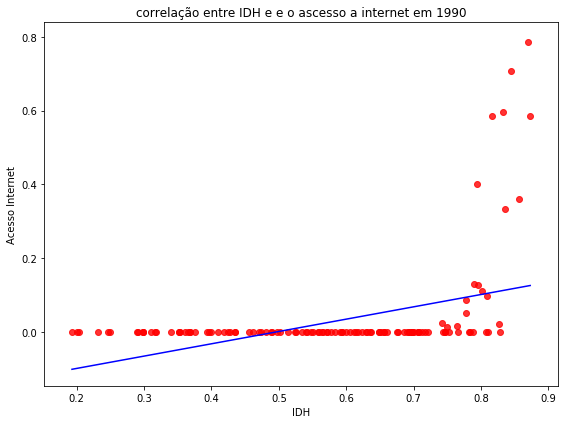

O coeficiente de correlacao entre o acesso a internet e o Idh é de 0.4229207586227928. 


In [20]:
reta(df["1990_IDH"],df['1990_Int'],('correlação entre IDH e e o ascesso a internet em 1990'),('IDH'),('Acesso Internet'))
c=df["1990_IDH"].corr(df["1990_Int"])
print("O coeficiente de correlacao entre o acesso a internet e o Idh é de {0}. ".format(c))

Ajuste linear entre X3 e X4:
Coeficiente linear: -23.971375970260155
Coeficiente angular: 51.78012016768959


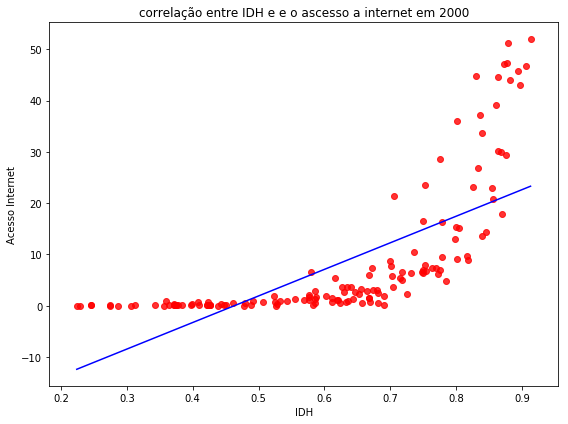

O coeficiente de correlacao entre o acesso a internet e o Idh é de 0.7063970496916342. 


In [21]:
reta(df["2000_IDH"],df['2000_Int'],('correlação entre IDH e e o ascesso a internet em 2000'),('IDH'),('Acesso Internet'))
b=df["2000_IDH"].corr(df["2000_Int"])
print("O coeficiente de correlacao entre o acesso a internet e o Idh é de {0}. ".format(b))

Ajuste linear entre X3 e X4:
Coeficiente linear: -49.22910473264113
Coeficiente angular: 110.8027530226474


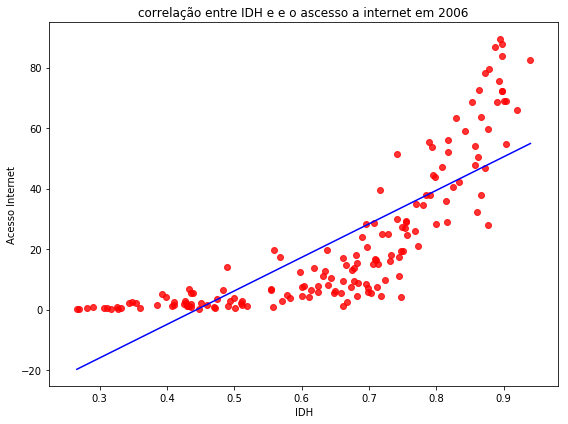

O coeficiente de correlacao entre o acesso a internet e o Idh é de 0.8060310768893242. 


In [22]:
reta(df["2006_IDH"],df['2006_Int'],('correlação entre IDH e e o ascesso a internet em 2006'),('IDH'),('Acesso Internet'))
a=df["2006_IDH"].corr(df["2006_Int"])
print("O coeficiente de correlacao entre o acesso a internet e o Idh é de {0}. ".format(a))

In [23]:
#  Multi boxplot 
#  Eventos historicos
